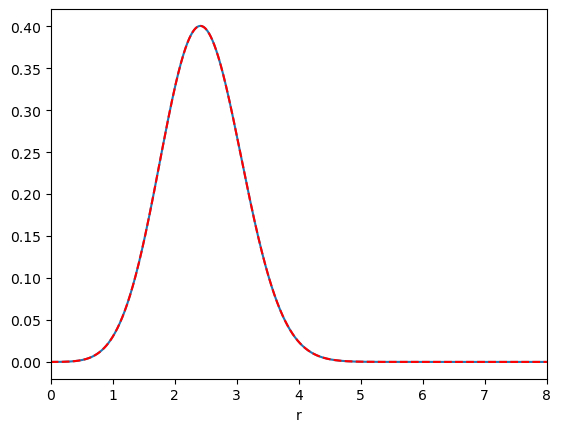

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

N = 400                                                   # Truncation ordem

L0 = 2                                               # Map parameter 

col = np.cos(np.arange(2*N + 4)*math.pi /(2*N + 3))      # collocation points (Verificado)

colr = col[1:N+2]

r = L0 * colr/(np.sqrt(1-colr**2))                       # physical domain (Verificado)             

#out_r = open('r_30_L02.txt', 'a')
#out_r.write(' ' +' '.join(str('%.18f'%n) for n in r)+'\n')
#out_r.close()


# Base Matrix (Tchebyshev Polinomials): 

SB = np.zeros([N+3,N+1])
rSB = np.zeros([N+3,N+1])
rrSB = np.zeros([N+3,N+1])


for i in range(N+1+1+1):
  SB[i,] = np.sin((2*i+1)*np.arctan(L0/r))                                                  

for i in range(N+1+1+1):
  rSB[i,] = -np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**2*(1+L0**2/r**2)) 

for i in range(N+1+1+1):
  rrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/r))*(2*i+1)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0**3/(r**5*(1+L0**2/r**2)**2)                     


psi = SB[0:N+1,:]        # Base function
rpsi = rSB[0:N+1,:]
rrpsi = rrSB[0:N+1,:]

# Initial conditions of Phi (Scalar field)                                    

r0 = 2

A0 = 0.08156195949119

sigma = 1

Phi_0 = A0*r**2*(np.exp(-(r-r0)**2/sigma**2)+np.exp(-(r+r0)**2/sigma**2))            # Phi initial data (Verificado)

inv_psi = np.linalg.inv(psi)
  
a0 = np.dot(Phi_0, inv_psi)  # coeficients a(0)  (Verificado)

#out_a = open('a0_30_L02.txt', 'a')
#out_a.write(' ' +' '.join(str('%.18f'%n) for n in a0)+'\n')
#out_a.close()


Phi = np.dot(a0, psi)        # approximative solution in t = 0
rPhi= np.dot(a0, rpsi)

########################### Plot: Initial Conditions of Phi

M = 3000       # plot truncation

rplot = np.linspace(0.000001,15,M)

colplot = rplot/np.sqrt(L0**2 + rplot**2)

SBplot = np.zeros([N+1,M])
rSBplot = np.zeros([N+1,M])
rrSBplot = np.zeros([N+1,M])

for i in range(N+1):
  SBplot[i,] = np.sin((2*i+1)*np.arctan(L0/rplot))

for i in range(N+1):
  rSBplot[i,] = -np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**2*(1+L0**2/rplot**2)) 

for i in range(N+1):
  rrSBplot[i,] = -np.sin((2*i+1)*np.arctan(L0/rplot))*(2*i+1)**2*L0**2/(rplot**4*(1+L0**2/rplot**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**3*(1+L0**2/rplot**2))-2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0**3/(rplot**5*(1+L0**2/rplot**2)**2)                     

psiplot = SBplot[0:(N+1),:] 
rpsiplot = rSBplot[0:(N+1),:]
rrpsiplot = rrSBplot[0:(N+1),:]

Phi_plot0 = A0*rplot**2*(np.exp(-(rplot-r0)**2/sigma**2)+np.exp(-(rplot+r0)**2/sigma**2))      


Phiplot = np.dot(a0, psiplot)


erro = Phi_plot0 - Phiplot

plt.plot(rplot, Phiplot, rplot, Phi_plot0, "--r")   #(Verificado)
plt.xlabel('r')
plt.xlim(0,8)
plt.show()


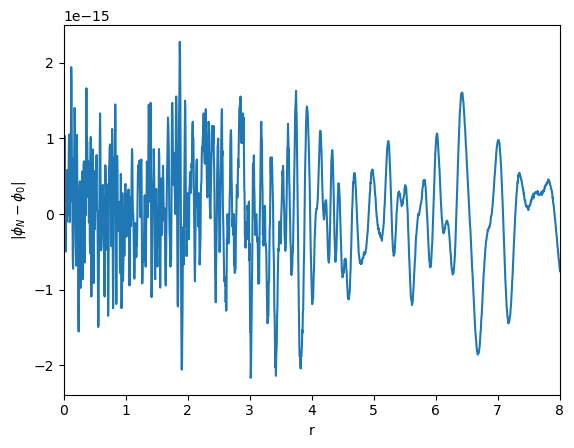

In [2]:
plt.plot(rplot, erro)
plt.xlabel('r')
plt.xlim(0,8)
plt.ylabel("$|\phi_N - \phi_0|$")
plt.show()

In [3]:
Pi_0 = np.zeros(N+1)
b0 = np.dot(Pi_0, psi)
Pi = np.dot(b0, psi)

c0 = np.zeros([N+1])     # guess value
for i in range(N+1):
  c0[i]  =   0.001
  
Chi=np.dot(c0,psi)    
rChi=np.dot(c0,rpsi)
rrChi=np.dot(c0,rrpsi)     

H0 = 4*rChi**2 + 4*rrChi + 8/r*rChi + 1/2*(rPhi)**2

JH = 8*np.dot(c0,rpsi)*rpsi + 4*rrpsi + 8/r*rpsi     # Jacobian Matrix

inv_JH = np.linalg.inv(JH)

N_int = 50

tol = 1e-40    # tolerance

# Newton Raphson loop
for i in range(N_int):
  Chi=np.dot(c0,psi)
  rChi=np.dot(c0,rpsi)
  rrChi=np.dot(c0,rrpsi)
  H0 = 4*rChi**2 + 4*rrChi + 8/r*rChi + 1/2*(rPhi)**2
  JH = 8*np.dot(c0,rpsi)*rpsi + 4*rrpsi + 8/r*rpsi
  cnew = c0 - np.dot(H0, inv_JH)
  if min(abs(cnew-c0)) < tol:
    break
  print(min(abs(cnew-c0)), end=' ')
  c0 = cnew

#out_c = open('c0_30_L02.txt', 'a')
#out_c.write(' ' +' '.join(str('%.18f'%n) for n in c0)+'\n')
#out_c.close()


0.0010002249351825972 2.610623222726036e-07 2.3199687333275515e-08 5.3934234682271655e-09 1.1281381444039007e-09 2.177316103257385e-10 4.118792954581139e-11 7.76877941579438e-12 1.4646455703757374e-12 2.7610878595290455e-13 5.2050256628537025e-14 9.812162492518314e-15 1.849722029633174e-15 3.4869697587958156e-16 6.573399564845831e-17 1.2391703769215152e-17 2.3359859172889275e-18 4.403908132252609e-19 8.301499157974093e-20 1.559886750847582e-20 2.937298488502764e-21 6.2566560206511535e-22 7.056071758566278e-23 

In [4]:
# Equation for Krr: momentum constraint
# Base functions of Krr

SB1 = 1/2*(SB[1:(N+2),:] + SB[0:(N+1),:])          # VERIFICADO
rSB1 = 1/2*(rSB[1:(N+2),:] + rSB[0:(N+1),:])
rrSB1 = 1/2*(rrSB[1:(N+2),:] + rrSB[0:(N+1),:])


# Base functions for Beta

SB2 = np.zeros([N+1,N+1])      
rSB2 = np.zeros([N+1,N+1])
rrSB2 = np.zeros([N+1,N+1])

for i in range(N+1):                                                   # VERIFICADO
  SB2[i,] = np.sin((2*(i+1/2)+1)*np.arctan(L0/r))                                                  

for i in range(N+1):
  rSB2[i,] = -np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**2*(1+L0**2/r**2))

for i in range(N+1):
  rrSB2[i,] = -np.sin((2*i+2)*np.arctan(L0/r))*(2*i+2)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0**3/(r**5*(1+L0**2/r**2)**2)

    

Quadrature Integration

In [5]:
Nq = int(3/2*N)           # Quadrature truncation

gauss_quadrature = np.polynomial.legendre.leggauss(Nq + 1) 

new_col = gauss_quadrature[0]            # Legendre quadrature points


# Legendre Polinomials

P = np.zeros([Nq+3,Nq+1])
colP = np.zeros([Nq+3,Nq+1])

P[0,] = 1
P[1,] = new_col

colP[0,] = 0
colP[1,] = 1

for i in range(2,Nq+3):
  P[i,] = ((2*i-1)*new_col*P[i-1,] - (i-1)*P[i-2,])/(i)   

for i in range(2,Nq+3):
  colP[i,] = i*P[i-1] + new_col*colP[i-1]

P_max = P[Nq+1]

colP_max = colP[Nq+1]

wq_col = 2/((1-new_col**2)*colP_max**2)    # Legendre weight (Verificado)

rq = L0*(1+new_col)/(1-new_col)            # Physical quadrature domain

qSB = np.zeros([Nq+3,Nq+1])                # Base function in quadrature points
qrSB = np.zeros([Nq+3,Nq+1])
qrrSB = np.zeros([Nq+3,Nq+1])




for i in range(Nq+1+1+1):
  qSB[i,] = np.sin((2*i+1)*np.arctan(L0/rq))                                                  

for i in range(Nq+1+1+1):
  qrSB[i,] = -np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**2*(1+L0**2/rq**2))

for i in range(Nq+1+1+1):
  qrrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/rq))*(2*i+1)**2*L0**2/(rq**4*(1+L0**2/rq**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**3*(1+L0**2/rq**2))-2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0**3/(rq**5*(1+L0**2/rq**2)**2)                                         


qpsi = qSB[0:N+1,:]
rqpsi = qrSB[0:N+1,:]
rrqpsi = qrrSB[0:N+1,:]


# Initial Phi in quadrature points

#qPhi = np.dot(a0, qpsi)      
#rqPhi= np.dot(a0, rqpsi)

# Initial Pi for quadrature points

#qPi = np.dot(b0, qpsi) 


# Initial Chi for quadrature points:

#qChi = np.dot(c0, qpsi)   # Verificado todos
#rqChi = np.dot(c0, rqpsi)
#rrqChi = np.dot(c0, rrqpsi)

# Initial values of Krr:


qSB1 = 1/2*(qSB[1:(N+2),:] + qSB[0:(N+1),:])          # VERIFICADO
qrSB1 = 1/2*(qrSB[1:(N+2),:] + qrSB[0:(N+1),:])
qrrSB1 = 1/2*(qrrSB[1:(N+2),:] + qrrSB[0:(N+1),:])


#qKrr = np.dot(ck0, qSB1) 

# Alpha na origem

psi_0 = np.zeros(N+1)

for i in range(N+1):
  psi_0[i,] = np.sin((2*i+1)*math.pi/2)     # arccot(0) = Pi/2  



In [6]:
# Runge Kutta 4th order

h = 0.001   # step size
tf = 15

It = int(tf/h)



t = 0


Alpha_origin = []
phi_origin = []
L2HC = []
phi_set = []

t1 = np.linspace(0, tf, len(Alpha_origin))

V = 0

#for i in range(It): 
while t <= tf:
 
  # First step
  Phi = np.dot(a0, psi)      
  rPhi = np.dot(a0, rpsi)
  rrPhi = np.dot(a0, rrpsi)      
  Pi = np.dot(b0, psi) 
  rPi= np.dot(b0, rpsi)
  Chi = np.dot(c0, psi) 
  rChi = np.dot(c0, rpsi)
  rrChi = np.dot(c0, rrpsi)   
  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1 
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi 
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2/r - SB2/r**2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr/r
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K1 = h*(dc)
  L1 = h*(da)
  N1 = h*(db)
  
  # L2-error associated to the Hamiltonian constraint
  qPhi = np.dot(a0, qpsi)      
  rqPhi= np.dot(a0, rqpsi)
  qPi = np.dot(b0, qpsi) 
  qChi = np.dot(c0, qpsi)
  rqChi = np.dot(c0, rqpsi)
  rrqChi = np.dot(c0, rrqpsi) 
  qKrr = np.dot(ck0, qSB1)
  H = 4*rqChi**2 + 4*rrqChi + 8*rqChi/rq + 3/4*np.exp(-4*qChi)*qKrr**2 + np.exp(4*qChi)*(1/2*qPi**2 + np.exp(-4*qChi)/2*rqPhi**2)   # Hamiltonian constraint (HC)
  L2HC.append((1/2*np.dot(H**2,wq_col))**(1/2))    # L2 error of HC 
  
  # Alpha origin
  Alpha_origin.append(1 + np.dot(al0, psi_0))
#  print(Alpha_origin)
  
  # Phi origin:  
  phi_origin.append(np.dot(a0, psi_0))
#  print(phi_origin)
    
  # Second step
  Phi = np.dot(a0 + L1/2, psi)     
  rPhi= np.dot(a0 + L1/2 , rpsi)
  rrPhi = np.dot(a0 + L1/2, rrpsi) 
  Pi = np.dot(b0 + N1/2, psi)
  rPi= np.dot(b0 + N1/2, rpsi)
  Chi = np.dot(c0 + K1/2, psi)
  rChi = np.dot(c0 + K1/2, rpsi)
  rrChi = np.dot(c0 + K1/2, rrpsi)
  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1 
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi 
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2/r - SB2/r**2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr/r
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)   
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)    
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K2 = h*(dc)
  L2 = h*(da)
  N2 = h*(db)

  # Third step
  Phi = np.dot(a0 + L2/2, psi)     
  rPhi = np.dot(a0 + L2/2 , rpsi)
  rrPhi = np.dot(a0 + L2/2, rrpsi) 
  Pi = np.dot(b0 + N2/2, psi)
  rPi= np.dot(b0 + N2/2, rpsi)
  Chi = np.dot(c0 + K2/2, psi)
  rChi = np.dot(c0 + K2/2, rpsi)
  rrChi = np.dot(c0 + K2/2, rrpsi)
  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi 
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2/r - SB2/r**2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr/r
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)   
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)    
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K3 = h*(dc)
  L3 = h*(da)
  N3 = h*(db) 

  # Forth step
  Phi = np.dot(a0 + L3, psi)     
  rPhi= np.dot(a0 + L3 , rpsi)
  rrPhi = np.dot(a0 + L3, rrpsi) 
  Pi = np.dot(b0 + N3, psi)
  rPi= np.dot(b0 + N3, rpsi)
  Chi = np.dot(c0 + K3, psi)
  rChi = np.dot(c0 + K3, rpsi)
  rrChi = np.dot(c0 + K3, rrpsi)
  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1 
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi 
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2/r - SB2/r**2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr/r
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)   
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)    
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K4 = h*(dc)
  L4 = h*(da)
  N4 = h*(db)  
  
  t = t + h
  print(t)
    
 # if t > 9:
 #   h = 0.0001
  #  Alpha_origin1[i] = 1 + np.dot(al0, psi_0)
  #  phi_origin1[i] = np.dot(a0, psi_0)
    
  # Evolution functions
  a0 = a0 + 1/6 * (L1 + 2*L2 + 2*L3 + L4)
  b0 = b0 + 1/6 * (N1 + 2*N2 + 2*N3 + N4)
  c0 = c0 + 1/6 * (K1 + 2*K2 + 2*K3 + K4)  
  phi_set.append(np.dot(a0, psiplot))

#  pi_set[i,:] = np.dot(b0, psiplot)
#  chi_set[i,:] = np.dot(c0, psiplot)

0.001
0.002
0.003
0.004
0.005
0.006
0.007
0.008
0.009000000000000001
0.010000000000000002
0.011000000000000003
0.012000000000000004
0.013000000000000005
0.014000000000000005
0.015000000000000006
0.016000000000000007
0.017000000000000008
0.01800000000000001
0.01900000000000001
0.02000000000000001
0.02100000000000001
0.022000000000000013
0.023000000000000013
0.024000000000000014
0.025000000000000015
0.026000000000000016
0.027000000000000017
0.028000000000000018
0.02900000000000002
0.03000000000000002
0.03100000000000002
0.03200000000000002
0.03300000000000002
0.03400000000000002
0.035000000000000024
0.036000000000000025
0.037000000000000026
0.03800000000000003
0.03900000000000003
0.04000000000000003
0.04100000000000003
0.04200000000000003
0.04300000000000003
0.04400000000000003
0.04500000000000003
0.046000000000000034
0.047000000000000035
0.048000000000000036
0.04900000000000004
0.05000000000000004
0.05100000000000004
0.05200000000000004
0.05300000000000004
0.05400000000000004
0.05500000

0.4270000000000003
0.4280000000000003
0.4290000000000003
0.4300000000000003
0.4310000000000003
0.43200000000000033
0.43300000000000033
0.43400000000000033
0.43500000000000033
0.43600000000000033
0.43700000000000033
0.43800000000000033
0.43900000000000033
0.44000000000000034
0.44100000000000034
0.44200000000000034
0.44300000000000034
0.44400000000000034
0.44500000000000034
0.44600000000000034
0.44700000000000034
0.44800000000000034
0.44900000000000034
0.45000000000000034
0.45100000000000035
0.45200000000000035
0.45300000000000035
0.45400000000000035
0.45500000000000035
0.45600000000000035
0.45700000000000035
0.45800000000000035
0.45900000000000035
0.46000000000000035
0.46100000000000035
0.46200000000000035
0.46300000000000036
0.46400000000000036
0.46500000000000036
0.46600000000000036
0.46700000000000036
0.46800000000000036
0.46900000000000036
0.47000000000000036
0.47100000000000036
0.47200000000000036
0.47300000000000036
0.47400000000000037
0.47500000000000037
0.47600000000000037
0.477

0.8560000000000006
0.8570000000000007
0.8580000000000007
0.8590000000000007
0.8600000000000007
0.8610000000000007
0.8620000000000007
0.8630000000000007
0.8640000000000007
0.8650000000000007
0.8660000000000007
0.8670000000000007
0.8680000000000007
0.8690000000000007
0.8700000000000007
0.8710000000000007
0.8720000000000007
0.8730000000000007
0.8740000000000007
0.8750000000000007
0.8760000000000007
0.8770000000000007
0.8780000000000007
0.8790000000000007
0.8800000000000007
0.8810000000000007
0.8820000000000007
0.8830000000000007
0.8840000000000007
0.8850000000000007
0.8860000000000007
0.8870000000000007
0.8880000000000007
0.8890000000000007
0.8900000000000007
0.8910000000000007
0.8920000000000007
0.8930000000000007
0.8940000000000007
0.8950000000000007
0.8960000000000007
0.8970000000000007
0.8980000000000007
0.8990000000000007
0.9000000000000007
0.9010000000000007
0.9020000000000007
0.9030000000000007
0.9040000000000007
0.9050000000000007
0.9060000000000007
0.9070000000000007
0.9080000000

1.2929999999999684
1.2939999999999683
1.2949999999999682
1.295999999999968
1.296999999999968
1.2979999999999678
1.2989999999999677
1.2999999999999676
1.3009999999999675
1.3019999999999674
1.3029999999999673
1.3039999999999672
1.304999999999967
1.305999999999967
1.3069999999999669
1.3079999999999667
1.3089999999999666
1.3099999999999665
1.3109999999999664
1.3119999999999663
1.3129999999999662
1.313999999999966
1.314999999999966
1.3159999999999659
1.3169999999999658
1.3179999999999656
1.3189999999999655
1.3199999999999654
1.3209999999999653
1.3219999999999652
1.322999999999965
1.323999999999965
1.3249999999999649
1.3259999999999648
1.3269999999999647
1.3279999999999645
1.3289999999999644
1.3299999999999643
1.3309999999999642
1.331999999999964
1.332999999999964
1.3339999999999639
1.3349999999999638
1.3359999999999637
1.3369999999999636
1.3379999999999634
1.3389999999999633
1.3399999999999632
1.340999999999963
1.341999999999963
1.342999999999963
1.3439999999999628
1.3449999999999627
1.3459

1.7359999999999196
1.7369999999999195
1.7379999999999194
1.7389999999999193
1.7399999999999192
1.740999999999919
1.741999999999919
1.7429999999999188
1.7439999999999187
1.7449999999999186
1.7459999999999185
1.7469999999999184
1.7479999999999183
1.7489999999999182
1.749999999999918
1.750999999999918
1.7519999999999178
1.7529999999999177
1.7539999999999176
1.7549999999999175
1.7559999999999174
1.7569999999999173
1.7579999999999172
1.758999999999917
1.759999999999917
1.7609999999999169
1.7619999999999167
1.7629999999999166
1.7639999999999165
1.7649999999999164
1.7659999999999163
1.7669999999999162
1.767999999999916
1.768999999999916
1.7699999999999159
1.7709999999999158
1.7719999999999156
1.7729999999999155
1.7739999999999154
1.7749999999999153
1.7759999999999152
1.776999999999915
1.777999999999915
1.7789999999999149
1.7799999999999148
1.7809999999999147
1.7819999999999145
1.7829999999999144
1.7839999999999143
1.7849999999999142
1.785999999999914
1.786999999999914
1.7879999999999139
1.788

2.1839999999998705
2.1849999999998704
2.1859999999998703
2.18699999999987
2.18799999999987
2.18899999999987
2.18999999999987
2.1909999999998697
2.1919999999998696
2.1929999999998695
2.1939999999998694
2.1949999999998693
2.195999999999869
2.196999999999869
2.197999999999869
2.198999999999869
2.1999999999998687
2.2009999999998686
2.2019999999998685
2.2029999999998684
2.2039999999998683
2.204999999999868
2.205999999999868
2.206999999999868
2.207999999999868
2.2089999999998677
2.2099999999998676
2.2109999999998675
2.2119999999998674
2.2129999999998673
2.213999999999867
2.214999999999867
2.215999999999867
2.216999999999867
2.2179999999998667
2.2189999999998666
2.2199999999998665
2.2209999999998664
2.2219999999998663
2.222999999999866
2.223999999999866
2.224999999999866
2.225999999999866
2.2269999999998658
2.2279999999998656
2.2289999999998655
2.2299999999998654
2.2309999999998653
2.231999999999865
2.232999999999865
2.233999999999865
2.234999999999865
2.2359999999998648
2.2369999999998647
2.

2.6289999999998215
2.6299999999998214
2.6309999999998213
2.631999999999821
2.632999999999821
2.633999999999821
2.634999999999821
2.6359999999998207
2.6369999999998206
2.6379999999998205
2.6389999999998204
2.6399999999998203
2.64099999999982
2.64199999999982
2.64299999999982
2.64399999999982
2.6449999999998197
2.6459999999998196
2.6469999999998195
2.6479999999998194
2.6489999999998193
2.649999999999819
2.650999999999819
2.651999999999819
2.652999999999819
2.6539999999998187
2.6549999999998186
2.6559999999998185
2.6569999999998184
2.6579999999998183
2.658999999999818
2.659999999999818
2.660999999999818
2.661999999999818
2.6629999999998177
2.6639999999998176
2.6649999999998175
2.6659999999998174
2.6669999999998173
2.667999999999817
2.668999999999817
2.669999999999817
2.670999999999817
2.6719999999998167
2.6729999999998166
2.6739999999998165
2.6749999999998164
2.6759999999998163
2.676999999999816
2.677999999999816
2.678999999999816
2.679999999999816
2.6809999999998158
2.6819999999998156
2.

3.076999999999772
3.077999999999772
3.078999999999772
3.079999999999772
3.0809999999997717
3.0819999999997716
3.0829999999997715
3.0839999999997714
3.0849999999997713
3.085999999999771
3.086999999999771
3.087999999999771
3.088999999999771
3.0899999999997707
3.0909999999997706
3.0919999999997705
3.0929999999997704
3.0939999999997703
3.09499999999977
3.09599999999977
3.09699999999977
3.09799999999977
3.0989999999997697
3.0999999999997696
3.1009999999997695
3.1019999999997694
3.1029999999997693
3.103999999999769
3.104999999999769
3.105999999999769
3.106999999999769
3.1079999999997687
3.1089999999997686
3.1099999999997685
3.1109999999997684
3.1119999999997683
3.112999999999768
3.113999999999768
3.114999999999768
3.115999999999768
3.1169999999997677
3.1179999999997676
3.1189999999997675
3.1199999999997674
3.1209999999997673
3.121999999999767
3.122999999999767
3.123999999999767
3.124999999999767
3.1259999999997667
3.1269999999997666
3.1279999999997665
3.1289999999997664
3.1299999999997663
3.

3.524999999999723
3.5259999999997227
3.5269999999997226
3.5279999999997225
3.5289999999997224
3.5299999999997222
3.530999999999722
3.531999999999722
3.532999999999722
3.533999999999722
3.5349999999997217
3.5359999999997216
3.5369999999997215
3.5379999999997214
3.5389999999997213
3.539999999999721
3.540999999999721
3.541999999999721
3.542999999999721
3.5439999999997207
3.5449999999997206
3.5459999999997205
3.5469999999997204
3.5479999999997203
3.54899999999972
3.54999999999972
3.55099999999972
3.55199999999972
3.5529999999997197
3.5539999999997196
3.5549999999997195
3.5559999999997194
3.5569999999997193
3.557999999999719
3.558999999999719
3.559999999999719
3.560999999999719
3.5619999999997187
3.5629999999997186
3.5639999999997185
3.5649999999997184
3.5659999999997183
3.566999999999718
3.567999999999718
3.568999999999718
3.569999999999718
3.5709999999997177
3.5719999999997176
3.5729999999997175
3.5739999999997174
3.5749999999997173
3.575999999999717
3.576999999999717
3.577999999999717
3.

3.9709999999996737
3.9719999999996736
3.9729999999996735
3.9739999999996733
3.9749999999996732
3.975999999999673
3.976999999999673
3.977999999999673
3.978999999999673
3.9799999999996727
3.9809999999996726
3.9819999999996725
3.9829999999996724
3.9839999999996722
3.984999999999672
3.985999999999672
3.986999999999672
3.987999999999672
3.9889999999996717
3.9899999999996716
3.9909999999996715
3.9919999999996714
3.9929999999996713
3.993999999999671
3.994999999999671
3.995999999999671
3.996999999999671
3.9979999999996707
3.9989999999996706
3.9999999999996705
4.000999999999671
4.001999999999671
4.0029999999996715
4.003999999999672
4.004999999999672
4.0059999999996725
4.006999999999673
4.007999999999673
4.0089999999996735
4.009999999999674
4.010999999999674
4.0119999999996745
4.012999999999675
4.013999999999675
4.0149999999996755
4.015999999999676
4.016999999999676
4.0179999999996765
4.018999999999677
4.019999999999677
4.0209999999996775
4.021999999999678
4.022999999999678
4.0239999999996785
4.

4.428999999999814
4.429999999999814
4.430999999999814
4.431999999999815
4.432999999999815
4.433999999999815
4.434999999999816
4.435999999999816
4.436999999999816
4.437999999999817
4.438999999999817
4.439999999999817
4.440999999999818
4.441999999999818
4.442999999999818
4.443999999999819
4.444999999999819
4.445999999999819
4.44699999999982
4.44799999999982
4.44899999999982
4.449999999999821
4.450999999999821
4.451999999999821
4.452999999999822
4.453999999999822
4.454999999999822
4.455999999999823
4.456999999999823
4.457999999999823
4.458999999999824
4.459999999999824
4.460999999999824
4.461999999999825
4.462999999999825
4.463999999999825
4.464999999999826
4.465999999999826
4.466999999999826
4.467999999999827
4.468999999999827
4.4699999999998274
4.470999999999828
4.471999999999828
4.4729999999998284
4.473999999999829
4.474999999999829
4.4759999999998294
4.47699999999983
4.47799999999983
4.4789999999998305
4.479999999999831
4.480999999999831
4.4819999999998315
4.482999999999832
4.48399999

4.883999999999966
4.884999999999966
4.885999999999966
4.886999999999967
4.887999999999967
4.888999999999967
4.889999999999968
4.890999999999968
4.891999999999968
4.892999999999969
4.893999999999969
4.894999999999969
4.89599999999997
4.89699999999997
4.89799999999997
4.898999999999971
4.899999999999971
4.900999999999971
4.901999999999972
4.902999999999972
4.903999999999972
4.904999999999973
4.905999999999973
4.906999999999973
4.907999999999974
4.908999999999974
4.909999999999974
4.910999999999975
4.911999999999975
4.912999999999975
4.913999999999976
4.914999999999976
4.915999999999976
4.916999999999977
4.917999999999977
4.918999999999977
4.919999999999978
4.920999999999978
4.921999999999978
4.922999999999979
4.923999999999979
4.924999999999979
4.92599999999998
4.92699999999998
4.92799999999998
4.928999999999981
4.929999999999981
4.930999999999981
4.931999999999982
4.932999999999982
4.933999999999982
4.934999999999983
4.935999999999983
4.936999999999983
4.937999999999984
4.93899999999998

5.342000000000119
5.343000000000119
5.344000000000119
5.34500000000012
5.34600000000012
5.34700000000012
5.348000000000121
5.349000000000121
5.350000000000121
5.351000000000122
5.352000000000122
5.353000000000122
5.354000000000123
5.355000000000123
5.356000000000123
5.357000000000124
5.358000000000124
5.359000000000124
5.360000000000125
5.361000000000125
5.362000000000125
5.363000000000126
5.364000000000126
5.365000000000126
5.366000000000127
5.367000000000127
5.368000000000127
5.369000000000128
5.370000000000128
5.371000000000128
5.372000000000129
5.373000000000129
5.374000000000129
5.37500000000013
5.37600000000013
5.37700000000013
5.378000000000131
5.379000000000131
5.380000000000131
5.381000000000132
5.382000000000132
5.383000000000132
5.384000000000133
5.385000000000133
5.386000000000133
5.387000000000134
5.388000000000134
5.389000000000134
5.390000000000135
5.391000000000135
5.392000000000135
5.393000000000136
5.394000000000136
5.395000000000136
5.396000000000137
5.39700000000013

5.798000000000271
5.799000000000271
5.800000000000272
5.801000000000272
5.802000000000272
5.803000000000273
5.804000000000273
5.805000000000273
5.806000000000274
5.807000000000274
5.808000000000274
5.809000000000275
5.810000000000275
5.811000000000275
5.812000000000276
5.813000000000276
5.814000000000276
5.815000000000277
5.816000000000277
5.817000000000277
5.818000000000278
5.819000000000278
5.820000000000278
5.821000000000279
5.822000000000279
5.823000000000279
5.82400000000028
5.82500000000028
5.82600000000028
5.827000000000281
5.828000000000281
5.829000000000281
5.830000000000282
5.831000000000282
5.832000000000282
5.833000000000283
5.834000000000283
5.835000000000283
5.836000000000284
5.837000000000284
5.838000000000284
5.839000000000285
5.840000000000285
5.841000000000285
5.842000000000286
5.843000000000286
5.844000000000286
5.845000000000287
5.846000000000287
5.847000000000287
5.848000000000288
5.849000000000288
5.850000000000288
5.851000000000289
5.852000000000289
5.85300000000

6.258000000000425
6.259000000000425
6.260000000000425
6.261000000000426
6.262000000000426
6.263000000000426
6.264000000000427
6.265000000000427
6.266000000000427
6.267000000000428
6.268000000000428
6.269000000000428
6.270000000000429
6.271000000000429
6.272000000000429
6.27300000000043
6.27400000000043
6.27500000000043
6.276000000000431
6.277000000000431
6.278000000000431
6.279000000000432
6.280000000000432
6.281000000000432
6.282000000000433
6.283000000000433
6.284000000000433
6.285000000000434
6.286000000000434
6.287000000000434
6.288000000000435
6.289000000000435
6.290000000000435
6.291000000000436
6.292000000000436
6.293000000000436
6.294000000000437
6.295000000000437
6.296000000000437
6.297000000000438
6.298000000000438
6.299000000000438
6.300000000000439
6.301000000000439
6.302000000000439
6.30300000000044
6.30400000000044
6.30500000000044
6.306000000000441
6.307000000000441
6.308000000000441
6.309000000000442
6.310000000000442
6.311000000000442
6.312000000000443
6.31300000000044

6.718000000000578
6.7190000000005785
6.720000000000579
6.721000000000579
6.7220000000005795
6.72300000000058
6.72400000000058
6.7250000000005805
6.726000000000581
6.727000000000581
6.7280000000005815
6.729000000000582
6.730000000000582
6.7310000000005825
6.732000000000583
6.733000000000583
6.7340000000005835
6.735000000000584
6.736000000000584
6.7370000000005845
6.738000000000585
6.739000000000585
6.7400000000005855
6.741000000000586
6.742000000000586
6.7430000000005865
6.744000000000587
6.745000000000587
6.7460000000005875
6.747000000000588
6.748000000000588
6.7490000000005885
6.750000000000589
6.751000000000589
6.7520000000005895
6.75300000000059
6.75400000000059
6.7550000000005905
6.756000000000591
6.757000000000591
6.7580000000005915
6.759000000000592
6.760000000000592
6.7610000000005925
6.762000000000593
6.763000000000593
6.7640000000005935
6.765000000000594
6.766000000000594
6.7670000000005945
6.768000000000595
6.769000000000595
6.7700000000005955
6.771000000000596
6.772000000000

7.178000000000732
7.179000000000732
7.1800000000007325
7.181000000000733
7.182000000000733
7.1830000000007335
7.184000000000734
7.185000000000734
7.1860000000007345
7.187000000000735
7.188000000000735
7.1890000000007355
7.190000000000736
7.191000000000736
7.1920000000007365
7.193000000000737
7.194000000000737
7.1950000000007375
7.196000000000738
7.197000000000738
7.1980000000007385
7.199000000000739
7.200000000000739
7.2010000000007395
7.20200000000074
7.20300000000074
7.2040000000007405
7.205000000000741
7.206000000000741
7.2070000000007415
7.208000000000742
7.209000000000742
7.2100000000007425
7.211000000000743
7.212000000000743
7.2130000000007435
7.214000000000744
7.215000000000744
7.2160000000007445
7.217000000000745
7.218000000000745
7.2190000000007455
7.220000000000746
7.221000000000746
7.2220000000007465
7.223000000000747
7.224000000000747
7.2250000000007475
7.226000000000748
7.227000000000748
7.2280000000007485
7.229000000000749
7.230000000000749
7.2310000000007495
7.2320000000

7.640000000000886
7.641000000000886
7.642000000000887
7.643000000000887
7.644000000000887
7.645000000000888
7.646000000000888
7.647000000000888
7.648000000000889
7.649000000000889
7.650000000000889
7.65100000000089
7.65200000000089
7.65300000000089
7.654000000000891
7.655000000000891
7.656000000000891
7.657000000000892
7.658000000000892
7.659000000000892
7.660000000000893
7.661000000000893
7.662000000000893
7.663000000000894
7.664000000000894
7.665000000000894
7.666000000000895
7.667000000000895
7.668000000000895
7.669000000000896
7.670000000000896
7.671000000000896
7.672000000000897
7.673000000000897
7.674000000000897
7.675000000000898
7.676000000000898
7.677000000000898
7.678000000000899
7.679000000000899
7.680000000000899
7.6810000000009
7.6820000000009
7.6830000000009
7.684000000000901
7.685000000000901
7.6860000000009014
7.687000000000902
7.688000000000902
7.6890000000009024
7.690000000000903
7.691000000000903
7.6920000000009034
7.693000000000904
7.694000000000904
7.69500000000090

8.09900000000095
8.10000000000095
8.10100000000095
8.102000000000949
8.103000000000948
8.104000000000948
8.105000000000947
8.106000000000947
8.107000000000946
8.108000000000946
8.109000000000945
8.110000000000944
8.111000000000944
8.112000000000943
8.113000000000943
8.114000000000942
8.115000000000942
8.116000000000941
8.11700000000094
8.11800000000094
8.11900000000094
8.120000000000939
8.121000000000938
8.122000000000938
8.123000000000937
8.124000000000937
8.125000000000936
8.126000000000936
8.127000000000935
8.128000000000934
8.129000000000934
8.130000000000933
8.131000000000933
8.132000000000932
8.133000000000932
8.134000000000931
8.13500000000093
8.13600000000093
8.13700000000093
8.138000000000929
8.139000000000928
8.140000000000928
8.141000000000927
8.142000000000927
8.143000000000926
8.144000000000926
8.145000000000925
8.146000000000925
8.147000000000924
8.148000000000923
8.149000000000923
8.150000000000922
8.151000000000922
8.152000000000921
8.15300000000092
8.15400000000092
8.1

8.564000000000693
8.565000000000692
8.566000000000692
8.567000000000691
8.56800000000069
8.56900000000069
8.57000000000069
8.571000000000689
8.572000000000688
8.573000000000688
8.574000000000687
8.575000000000687
8.576000000000686
8.577000000000686
8.578000000000685
8.579000000000685
8.580000000000684
8.581000000000683
8.582000000000683
8.583000000000682
8.584000000000682
8.585000000000681
8.58600000000068
8.58700000000068
8.58800000000068
8.589000000000679
8.590000000000678
8.591000000000678
8.592000000000677
8.593000000000677
8.594000000000676
8.595000000000676
8.596000000000675
8.597000000000675
8.598000000000674
8.599000000000673
8.600000000000673
8.601000000000672
8.602000000000672
8.603000000000671
8.60400000000067
8.60500000000067
8.60600000000067
8.607000000000669
8.608000000000668
8.609000000000668
8.610000000000667
8.611000000000667
8.612000000000666
8.613000000000666
8.614000000000665
8.615000000000665
8.616000000000664
8.617000000000663
8.618000000000663
8.619000000000662
8

9.030000000000435
9.031000000000434
9.032000000000433
9.033000000000433
9.034000000000432
9.035000000000432
9.036000000000431
9.03700000000043
9.03800000000043
9.03900000000043
9.040000000000429
9.041000000000428
9.042000000000428
9.043000000000427
9.044000000000427
9.045000000000426
9.046000000000426
9.047000000000425
9.048000000000425
9.049000000000424
9.050000000000423
9.051000000000423
9.052000000000422
9.053000000000422
9.054000000000421
9.05500000000042
9.05600000000042
9.05700000000042
9.058000000000419
9.059000000000418
9.060000000000418
9.061000000000417
9.062000000000417
9.063000000000416
9.064000000000416
9.065000000000415
9.066000000000415
9.067000000000414
9.068000000000414
9.069000000000413
9.070000000000412
9.071000000000412
9.072000000000411
9.07300000000041
9.07400000000041
9.07500000000041
9.076000000000409
9.077000000000409
9.078000000000408
9.079000000000407
9.080000000000407
9.081000000000406
9.082000000000406
9.083000000000405
9.084000000000405
9.085000000000404
9

9.495000000000177
9.496000000000176
9.497000000000176
9.498000000000175
9.499000000000175
9.500000000000174
9.501000000000174
9.502000000000173
9.503000000000172
9.504000000000172
9.505000000000171
9.50600000000017
9.50700000000017
9.50800000000017
9.509000000000169
9.510000000000169
9.511000000000168
9.512000000000167
9.513000000000167
9.514000000000166
9.515000000000166
9.516000000000165
9.517000000000165
9.518000000000164
9.519000000000164
9.520000000000163
9.521000000000162
9.522000000000162
9.523000000000161
9.52400000000016
9.52500000000016
9.52600000000016
9.52700000000016
9.528000000000159
9.529000000000158
9.530000000000157
9.531000000000157
9.532000000000156
9.533000000000156
9.534000000000155
9.535000000000155
9.536000000000154
9.537000000000154
9.538000000000153
9.539000000000152
9.540000000000152
9.541000000000151
9.54200000000015
9.54300000000015
9.54400000000015
9.54500000000015
9.546000000000149
9.547000000000148
9.548000000000147
9.549000000000147
9.550000000000146
9.5

9.960999999999919
9.961999999999918
9.962999999999917
9.963999999999917
9.964999999999916
9.965999999999916
9.966999999999915
9.967999999999915
9.968999999999914
9.969999999999914
9.970999999999913
9.971999999999912
9.972999999999912
9.973999999999911
9.97499999999991
9.97599999999991
9.97699999999991
9.97799999999991
9.978999999999909
9.979999999999908
9.980999999999908
9.981999999999907
9.982999999999906
9.983999999999906
9.984999999999905
9.985999999999905
9.986999999999904
9.987999999999904
9.988999999999903
9.989999999999903
9.990999999999902
9.991999999999901
9.9929999999999
9.9939999999999
9.9949999999999
9.9959999999999
9.996999999999899
9.997999999999898
9.998999999999898
9.999999999999897
10.000999999999896
10.001999999999896
10.002999999999895
10.003999999999895
10.004999999999894
10.005999999999894
10.006999999999893
10.007999999999893
10.008999999999892
10.009999999999891
10.01099999999989
10.01199999999989
10.01299999999989
10.01399999999989
10.014999999999889
10.01599999

10.403999999999673
10.404999999999673
10.405999999999672
10.406999999999671
10.40799999999967
10.40899999999967
10.40999999999967
10.41099999999967
10.411999999999669
10.412999999999668
10.413999999999668
10.414999999999667
10.415999999999666
10.416999999999666
10.417999999999665
10.418999999999665
10.419999999999664
10.420999999999664
10.421999999999663
10.422999999999663
10.423999999999662
10.424999999999661
10.42599999999966
10.42699999999966
10.42799999999966
10.42899999999966
10.429999999999659
10.430999999999658
10.431999999999658
10.432999999999657
10.433999999999656
10.434999999999656
10.435999999999655
10.436999999999655
10.437999999999654
10.438999999999654
10.439999999999653
10.440999999999653
10.441999999999652
10.442999999999651
10.443999999999651
10.44499999999965
10.44599999999965
10.44699999999965
10.447999999999649
10.448999999999648
10.449999999999648
10.450999999999647
10.451999999999646
10.452999999999646
10.453999999999645
10.454999999999645
10.455999999999644
10.4

10.84099999999943
10.84199999999943
10.84299999999943
10.84399999999943
10.844999999999429
10.845999999999428
10.846999999999428
10.847999999999427
10.848999999999426
10.849999999999426
10.850999999999425
10.851999999999425
10.852999999999424
10.853999999999424
10.854999999999423
10.855999999999423
10.856999999999422
10.857999999999421
10.858999999999421
10.85999999999942
10.86099999999942
10.86199999999942
10.862999999999419
10.863999999999418
10.864999999999418
10.865999999999417
10.866999999999416
10.867999999999416
10.868999999999415
10.869999999999415
10.870999999999414
10.871999999999414
10.872999999999413
10.873999999999413
10.874999999999412
10.875999999999411
10.876999999999411
10.87799999999941
10.87899999999941
10.87999999999941
10.880999999999409
10.881999999999408
10.882999999999408
10.883999999999407
10.884999999999406
10.885999999999406
10.886999999999405
10.887999999999405
10.888999999999404
10.889999999999404
10.890999999999403
10.891999999999403
10.892999999999402
10.

11.283999999999185
11.284999999999185
11.285999999999184
11.286999999999184
11.287999999999183
11.288999999999183
11.289999999999182
11.290999999999181
11.291999999999181
11.29299999999918
11.29399999999918
11.29499999999918
11.295999999999179
11.296999999999178
11.297999999999178
11.298999999999177
11.299999999999176
11.300999999999176
11.301999999999175
11.302999999999175
11.303999999999174
11.304999999999174
11.305999999999173
11.306999999999173
11.307999999999172
11.308999999999171
11.309999999999171
11.31099999999917
11.31199999999917
11.31299999999917
11.313999999999169
11.314999999999168
11.315999999999168
11.316999999999167
11.317999999999167
11.318999999999166
11.319999999999165
11.320999999999165
11.321999999999164
11.322999999999164
11.323999999999163
11.324999999999163
11.325999999999162
11.326999999999162
11.327999999999161
11.32899999999916
11.32999999999916
11.33099999999916
11.331999999999159
11.332999999999158
11.333999999999158
11.334999999999157
11.335999999999157
11

11.719999999998944
11.720999999998943
11.721999999998943
11.722999999998942
11.723999999998941
11.724999999998941
11.72599999999894
11.72699999999894
11.72799999999894
11.728999999998939
11.729999999998938
11.730999999998938
11.731999999998937
11.732999999998937
11.733999999998936
11.734999999998935
11.735999999998935
11.736999999998934
11.737999999998934
11.738999999998933
11.739999999998933
11.740999999998932
11.741999999998932
11.742999999998931
11.74399999999893
11.74499999999893
11.74599999999893
11.746999999998929
11.747999999998928
11.748999999998928
11.749999999998927
11.750999999998927
11.751999999998926
11.752999999998925
11.753999999998925
11.754999999998924
11.755999999998924
11.756999999998923
11.757999999998923
11.758999999998922
11.759999999998922
11.760999999998921
11.76199999999892
11.76299999999892
11.76399999999892
11.764999999998919
11.765999999998918
11.766999999998918
11.767999999998917
11.768999999998917
11.769999999998916
11.770999999998915
11.771999999998915
11

12.162999999998698
12.163999999998698
12.164999999998697
12.165999999998697
12.166999999998696
12.167999999998695
12.168999999998695
12.169999999998694
12.170999999998694
12.171999999998693
12.172999999998693
12.173999999998692
12.174999999998692
12.175999999998691
12.17699999999869
12.17799999999869
12.17899999999869
12.179999999998689
12.180999999998688
12.181999999998688
12.182999999998687
12.183999999998687
12.184999999998686
12.185999999998685
12.186999999998685
12.187999999998684
12.188999999998684
12.189999999998683
12.190999999998683
12.191999999998682
12.192999999998682
12.193999999998681
12.19499999999868
12.19599999999868
12.19699999999868
12.197999999998679
12.198999999998678
12.199999999998678
12.200999999998677
12.201999999998677
12.202999999998676
12.203999999998675
12.204999999998675
12.205999999998674
12.206999999998674
12.207999999998673
12.208999999998673
12.209999999998672
12.210999999998672
12.211999999998671
12.21299999999867
12.21399999999867
12.21499999999867
12

12.600999999998455
12.601999999998455
12.602999999998454
12.603999999998454
12.604999999998453
12.605999999998453
12.606999999998452
12.607999999998452
12.608999999998451
12.60999999999845
12.61099999999845
12.61199999999845
12.612999999998449
12.613999999998448
12.614999999998448
12.615999999998447
12.616999999998447
12.617999999998446
12.618999999998445
12.619999999998445
12.620999999998444
12.621999999998444
12.622999999998443
12.623999999998443
12.624999999998442
12.625999999998442
12.626999999998441
12.62799999999844
12.62899999999844
12.62999999999844
12.630999999998439
12.631999999998438
12.632999999998438
12.633999999998437
12.634999999998437
12.635999999998436
12.636999999998435
12.637999999998435
12.638999999998434
12.639999999998434
12.640999999998433
12.641999999998433
12.642999999998432
12.643999999998432
12.644999999998431
12.64599999999843
12.64699999999843
12.64799999999843
12.648999999998429
12.649999999998428
12.650999999998428
12.651999999998427
12.652999999998427
12

13.036999999998214
13.037999999998213
13.038999999998213
13.039999999998212
13.040999999998212
13.041999999998211
13.04299999999821
13.04399999999821
13.04499999999821
13.045999999998209
13.046999999998208
13.047999999998208
13.048999999998207
13.049999999998207
13.050999999998206
13.051999999998205
13.052999999998205
13.053999999998204
13.054999999998204
13.055999999998203
13.056999999998203
13.057999999998202
13.058999999998202
13.059999999998201
13.0609999999982
13.0619999999982
13.0629999999982
13.063999999998199
13.064999999998198
13.065999999998198
13.066999999998197
13.067999999998197
13.068999999998196
13.069999999998196
13.070999999998195
13.071999999998194
13.072999999998194
13.073999999998193
13.074999999998193
13.075999999998192
13.076999999998192
13.077999999998191
13.07899999999819
13.07999999999819
13.08099999999819
13.081999999998189
13.082999999998188
13.083999999998188
13.084999999998187
13.085999999998187
13.086999999998186
13.087999999998186
13.088999999998185
13.08

13.47799999999797
13.478999999997969
13.479999999997968
13.480999999997968
13.481999999997967
13.482999999997967
13.483999999997966
13.484999999997966
13.485999999997965
13.486999999997964
13.487999999997964
13.488999999997963
13.489999999997963
13.490999999997962
13.491999999997962
13.492999999997961
13.49399999999796
13.49499999999796
13.49599999999796
13.496999999997959
13.497999999997958
13.498999999997958
13.499999999997957
13.500999999997957
13.501999999997956
13.502999999997956
13.503999999997955
13.504999999997954
13.505999999997954
13.506999999997953
13.507999999997953
13.508999999997952
13.509999999997952
13.510999999997951
13.51199999999795
13.51299999999795
13.51399999999795
13.514999999997949
13.515999999997948
13.516999999997948
13.517999999997947
13.518999999997947
13.519999999997946
13.520999999997946
13.521999999997945
13.522999999997944
13.523999999997944
13.524999999997943
13.525999999997943
13.526999999997942
13.527999999997942
13.528999999997941
13.52999999999794
1

13.917999999997726
13.918999999997725
13.919999999997724
13.920999999997724
13.921999999997723
13.922999999997723
13.923999999997722
13.924999999997722
13.925999999997721
13.92699999999772
13.92799999999772
13.92899999999772
13.929999999997719
13.930999999997718
13.931999999997718
13.932999999997717
13.933999999997717
13.934999999997716
13.935999999997716
13.936999999997715
13.937999999997714
13.938999999997714
13.939999999997713
13.940999999997713
13.941999999997712
13.942999999997712
13.943999999997711
13.94499999999771
13.94599999999771
13.94699999999771
13.947999999997709
13.948999999997708
13.949999999997708
13.950999999997707
13.951999999997707
13.952999999997706
13.953999999997706
13.954999999997705
13.955999999997704
13.956999999997704
13.957999999997703
13.958999999997703
13.959999999997702
13.960999999997702
13.961999999997701
13.9629999999977
13.9639999999977
13.9649999999977
13.965999999997699
13.966999999997698
13.967999999997698
13.968999999997697
13.969999999997697
13.97

14.358999999997481
14.35999999999748
14.36099999999748
14.36199999999748
14.362999999997479
14.363999999997478
14.364999999997478
14.365999999997477
14.366999999997477
14.367999999997476
14.368999999997476
14.369999999997475
14.370999999997474
14.371999999997474
14.372999999997473
14.373999999997473
14.374999999997472
14.375999999997472
14.376999999997471
14.37799999999747
14.37899999999747
14.37999999999747
14.380999999997469
14.381999999997468
14.382999999997468
14.383999999997467
14.384999999997467
14.385999999997466
14.386999999997466
14.387999999997465
14.388999999997464
14.389999999997464
14.390999999997463
14.391999999997463
14.392999999997462
14.393999999997462
14.394999999997461
14.39599999999746
14.39699999999746
14.39799999999746
14.398999999997459
14.399999999997458
14.400999999997458
14.401999999997457
14.402999999997457
14.403999999997456
14.404999999997456
14.405999999997455
14.406999999997455
14.407999999997454
14.408999999997453
14.409999999997453
14.410999999997452
14

14.801999999997236
14.802999999997235
14.803999999997234
14.804999999997234
14.805999999997233
14.806999999997233
14.807999999997232
14.808999999997232
14.809999999997231
14.81099999999723
14.81199999999723
14.81299999999723
14.813999999997229
14.814999999997228
14.815999999997228
14.816999999997227
14.817999999997227
14.818999999997226
14.819999999997226
14.820999999997225
14.821999999997225
14.822999999997224
14.823999999997223
14.824999999997223
14.825999999997222
14.826999999997222
14.827999999997221
14.82899999999722
14.82999999999722
14.83099999999722
14.831999999997219
14.832999999997218
14.833999999997218
14.834999999997217
14.835999999997217
14.836999999997216
14.837999999997216
14.838999999997215
14.839999999997215
14.840999999997214
14.841999999997213
14.842999999997213
14.843999999997212
14.844999999997212
14.845999999997211
14.84699999999721
14.84799999999721
14.84899999999721
14.849999999997209
14.850999999997208
14.851999999997208
14.852999999997207
14.853999999997207
14

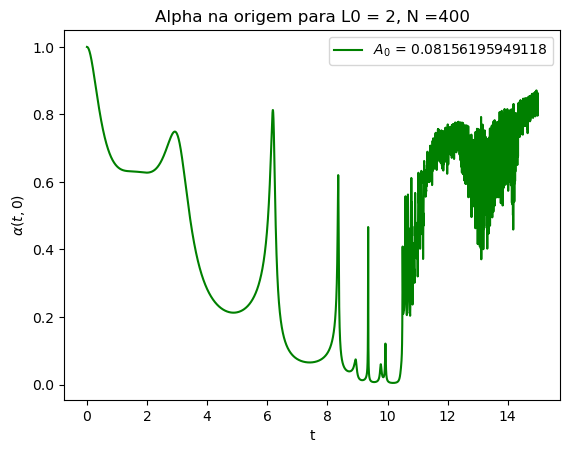

In [7]:
t1 = np.linspace(0, tf, len(Alpha_origin))
# Searching for critical amplitude:

plt.plot(t1, Alpha_origin, color = "g", label = "$A_0$ = {:}".format(A0))
plt.title("Alpha na origem para L0 = 2, N ={:}".format(N))
plt.ylabel(r"$\alpha(t,0)$")
plt.xlabel("t")
plt.legend()

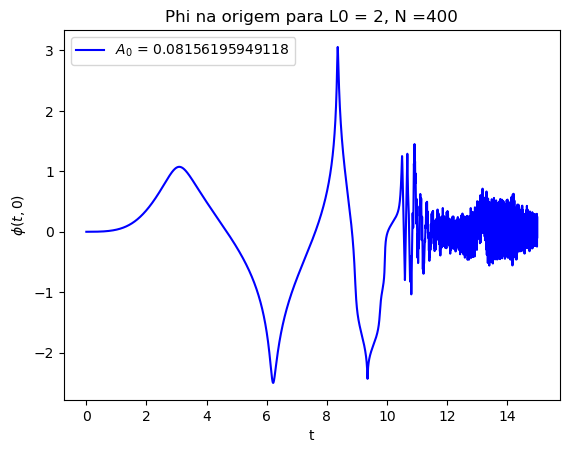

In [8]:
# Phi origin

plt.plot(t1, phi_origin, color = "b", label = "$A_0$ = {:}".format(A0))
plt.title("Phi na origem para L0 = 2, N ={:}".format(N))
plt.ylabel("$\phi(t,0)$")
plt.xlabel("t")    
plt.legend()

In [9]:
# Animation plot for Phi: Scalar Field

#from matplotlib.animation import FuncAnimation
#from IPython.display import HTML

#fig = plt.figure()
#ax = plt.axes(xlim=(0, 15),ylim = (-2.2, 1.2))
#line, = ax.plot([], [], lw=2)

x = rplot

def init():
    line.set_data([], [])
    return line,

def animate(i):
  y = phi_set[i,:]
  line.set_data(x, y)
  return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=It, interval=0.5, blit=True)

HTML(anim.to_html5_video())

NameError: name 'FuncAnimation' is not defined

In [ ]:
# Erro L2 of Hamiltonian constraint

plt.plot(t1,L2HC)
plt.yscale("log")
plt.ylabel("log(L2HC)")
plt.xlabel("t")
plt.title("log(L2Hc) para $N = 30$, $L_0 = 6$ e $A_0 =$")